<a href="https://colab.research.google.com/github/Nawel-Bellil/AI---Deep-Learning--/blob/main/DL_Chapter_01_Challenge_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, you will train an MLP to classify images from the MNIST database hand-written digit database, using both tensorflow/keras and pytorch.

**MNIST Handwritten Digit Classification Dataset**

The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

The process will be following these steps:

Load and visualize the data
Define a neural network
Train the model
Evaluate the performance of our trained model on a test dataset!


**Part I:** Using Tensorflow/Keras

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


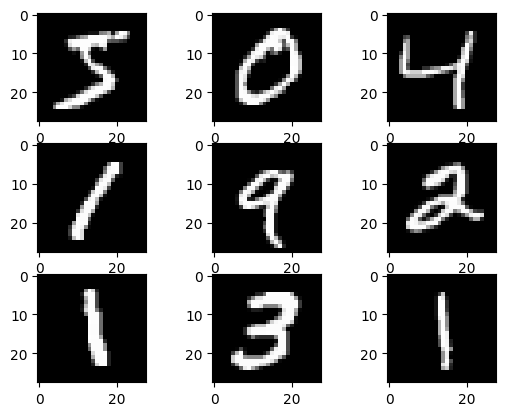

In [ ]:
#importing required libraries, including tensorflow, keras, matplotlib and mnist dataset
import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

You can see that there are 60,000 examples in the training dataset and 10,000 in the test dataset and that images are indeed square with 28×28 pixels.

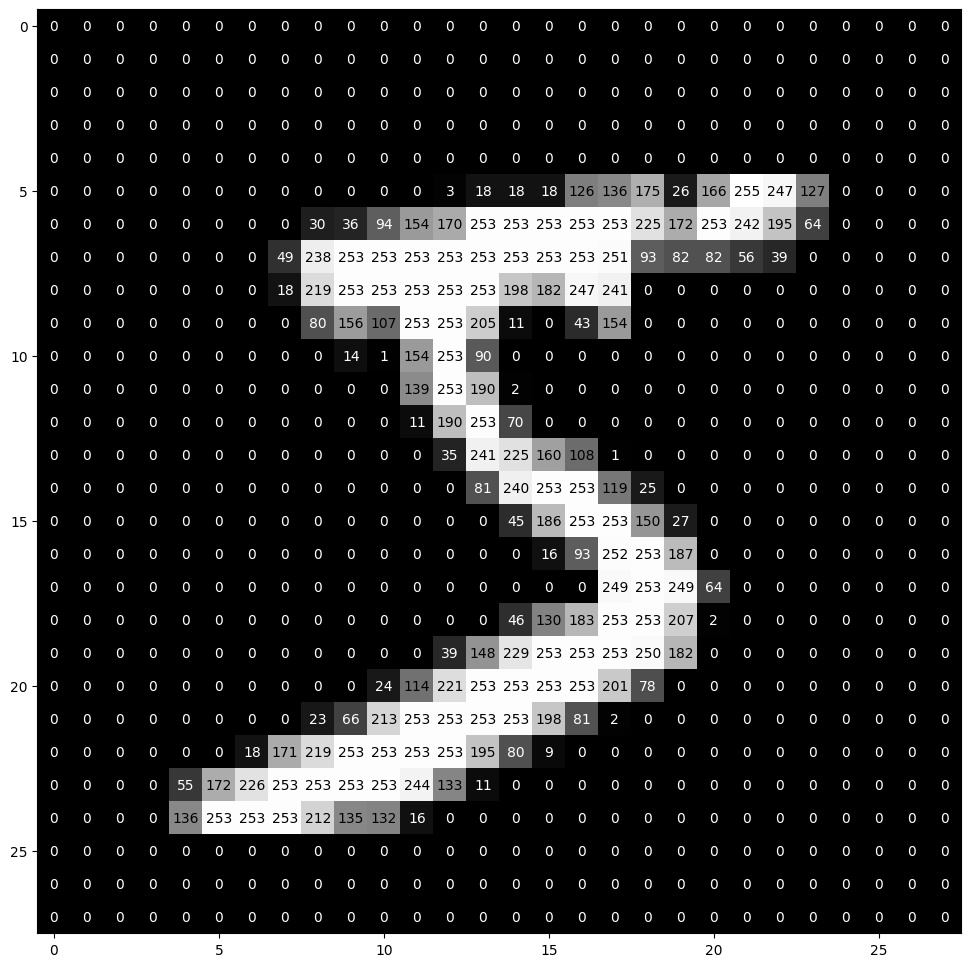

In [ ]:
#View an input image in more details
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

In [ ]:
#Rescale the Images by Dividing Every Pixel in Every Image by 255
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [ ]:
#Encode Categorical Integer Labels Using a One-Hot encoder Scheme
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


For the model, you will use a basic sequential NN model, which contains a flatten layer, Dense layers, and dropout layers. If you don't understand how each layer works, don't worry. You will learn about each single layer in the upcoming chapters and units.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trai

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
#Train the Model
from keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5',
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)



Epoch 1/10
375/375 [==============================] - ETA: 0s - loss: 0.2887 - accuracy: 0.9101
Epoch 1: val_loss improved from inf to 0.12437, saving model to mnist.model.best.hdf5
375/375 [==============================] - 10s 23ms/step - loss: 0.2887 - accuracy: 0.9101 - val_loss: 0.1244 - val_accuracy: 0.9612
Epoch 2/10
375/375 [==============================] - ETA: 0s - loss: 0.1165 - accuracy: 0.9638
Epoch 2: val_loss improved from 0.12437 to 0.09683, saving model to mnist.model.best.hdf5
375/375 [==============================] - 9s 23ms/step - loss: 0.1165 - accuracy: 0.9638 - val_loss: 0.0968 - val_accuracy: 0.9713
Epoch 3/10
373/375 [============================>.] - ETA: 0s - loss: 0.0817 - accuracy: 0.9753
Epoch 3: val_loss improved from 0.09683 to 0.09491, saving model to mnist.model.best.hdf5
375/375 [==============================] - 7s 19ms/step - loss: 0.0817 - accuracy: 0.9753 - val_loss: 0.0949 - val_accuracy: 0.9722
Epoch 4/10
374/375 [============================>

In [ ]:
#Load the Model with the Best Classification Accuracy on the Validation Set
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

In [ ]:
#Calculate the Classification Accuracy on the Test Set
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 97.9600%


**Part II:** Using Pytorch

In [ ]:
# import libraries
import torch
import numpy as np

In [ ]:
# The MNIST datasets are hosted on yann.lecun.com that has moved under CloudFlare protection
# Run this script to enable the datasets download
# Reference: https://github.com/pytorch/vision/issues/1938

from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
    num_workers=num_workers)

Visualize a Batch of Training Data
The first step in a classification task is to take a look at the data, make sure it is loaded correctly, then make any initial observations about patterns in that data.

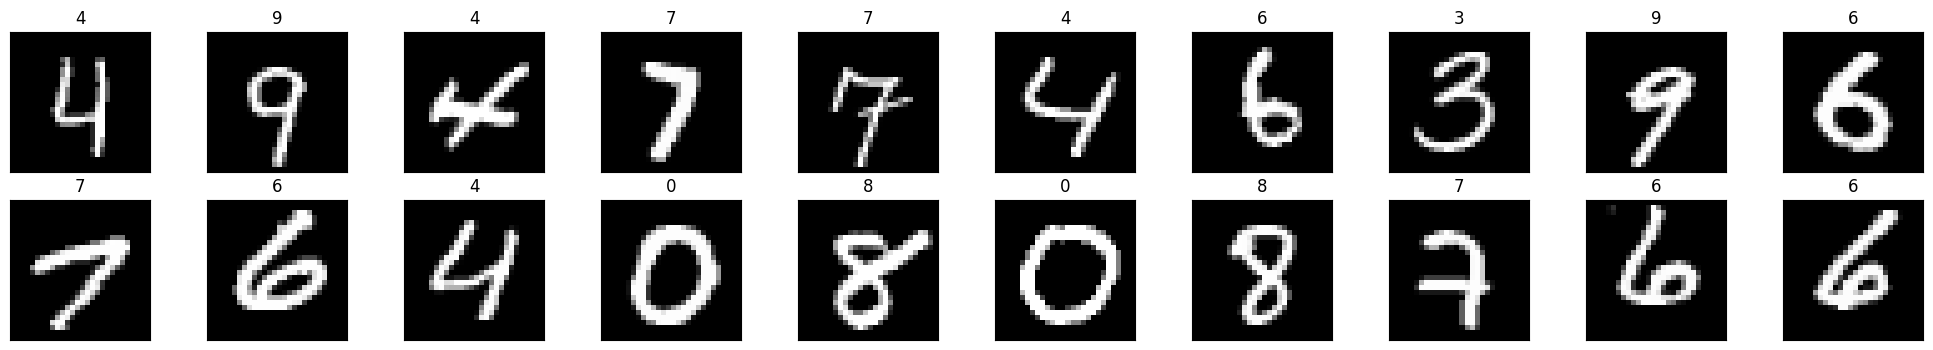

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

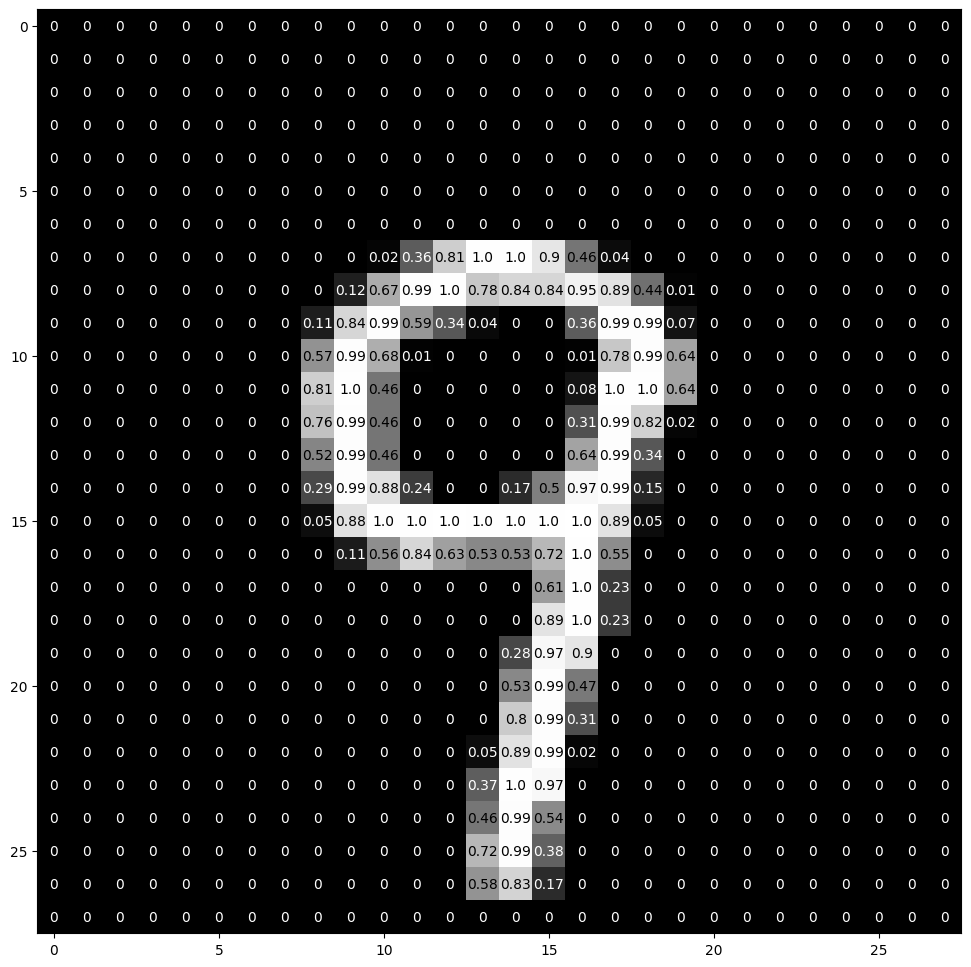

In [ ]:
#View an image in more details
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')



```
# Ce texte est au format code
```

**Network Architecture**

The architecture will be responsible for seeing as input a 784-dim Tensor of pixel values for each image, and producing a Tensor of length 10 (our number of classes) that indicates the class scores for an input image. This particular example uses two hidden layers and dropout to avoid overfitting.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # number of hidden nodes in each layer (512)
        hidden_1 = 512
        hidden_2 = 512
        # linear layer (784 -> hidden_1)
        self.fc1 = nn.Linear(28 * 28, hidden_1)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(hidden_2, 10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.dropout(x)
        # add output layer
        x = self.fc3(x)
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


**Loss Function and Optimizer**

It's recommended that you use cross-entropy loss for classification. If you look at the Pytorch documentation, you can see that PyTorch's cross entropy function applies a softmax funtion to the output layer and then calculates the log loss.

In [ ]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

**Train the Network**

The steps for training/learning from a batch of data are described in the comments below:



1.  Clear the gradients of all optimized variables
2.  Forward pass: compute predicted outputs by passing inputs to the model
3.   Calculate the loss
4.   Backward pass: compute gradient of the loss with respect to model parameters
5.   Perform a single optimization step (parameter update)
6.   Update average training loss

The following loop trains for 30 epochs; take a look at how the values for the training loss decrease over time. We want it to decrease while also avoiding overfitting the training data.

In [ ]:
# number of epochs to train the model
n_epochs = 30

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0

    ###################
    # train the model #
    ###################
    model.train() # prep model for training
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()

    ######################
    # validate the model #
    ######################
    model.eval() # prep model for evaluation
    for data, target in valid_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update running validation loss
        valid_loss += loss.item()

    # print training/validation statistics
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader)
    valid_loss = valid_loss/len(valid_loader)

    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1,
        train_loss,
        valid_loss
        ))

    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.955585 	Validation Loss: 0.383967
Validation loss decreased (inf --> 0.383967).  Saving model ...
Epoch: 2 	Training Loss: 0.358673 	Validation Loss: 0.287860
Validation loss decreased (0.383967 --> 0.287860).  Saving model ...
Epoch: 3 	Training Loss: 0.283923 	Validation Loss: 0.235131
Validation loss decreased (0.287860 --> 0.235131).  Saving model ...
Epoch: 4 	Training Loss: 0.232726 	Validation Loss: 0.203493
Validation loss decreased (0.235131 --> 0.203493).  Saving model ...
Epoch: 5 	Training Loss: 0.199131 	Validation Loss: 0.175817
Validation loss decreased (0.203493 --> 0.175817).  Saving model ...
Epoch: 6 	Training Loss: 0.172395 	Validation Loss: 0.162368
Validation loss decreased (0.175817 --> 0.162368).  Saving model ...
Epoch: 7 	Training Loss: 0.151852 	Validation Loss: 0.140559
Validation loss decreased (0.162368 --> 0.140559).  Saving model ...
Epoch: 8 	Training Loss: 0.135366 	Validation Loss: 0.127944
Validation loss decreased (0.14055

Now after trying simple NN models, using both tensorflow and pytorch libraries, you are ready to explore advanced NNs architectures and try out more tools and methodologies. Enjoy learning!

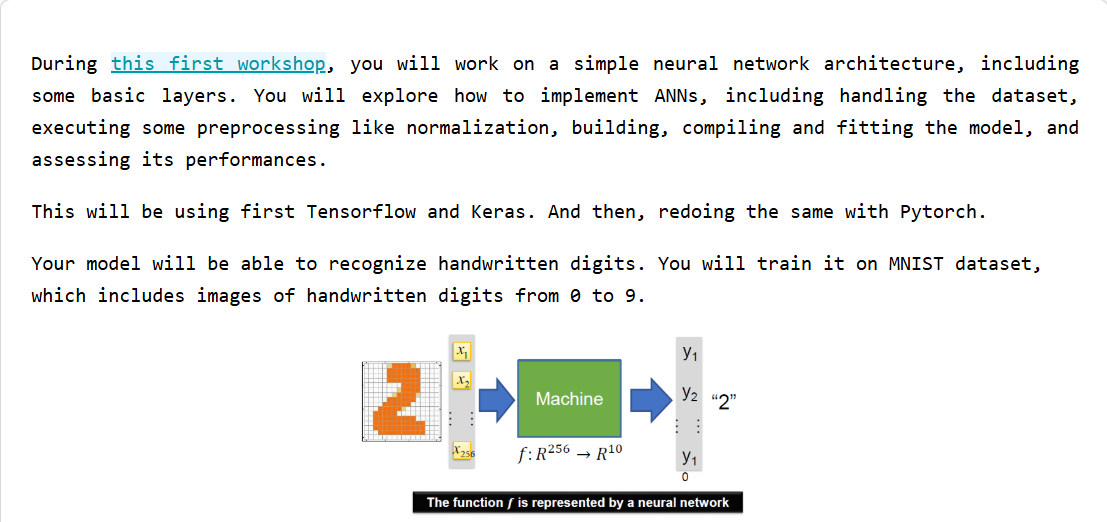
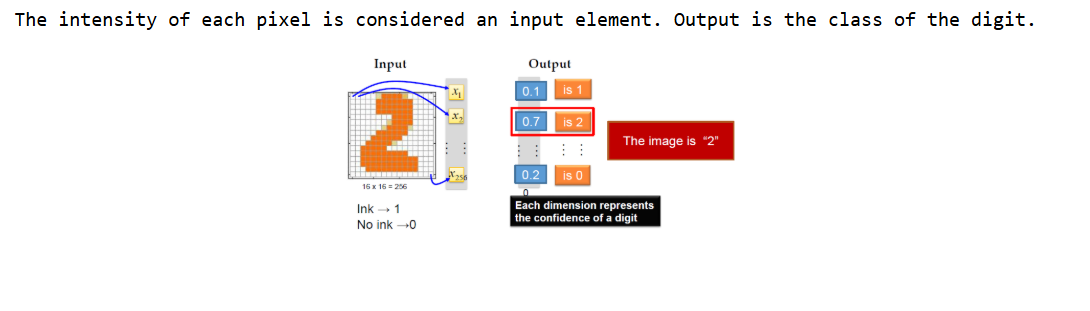

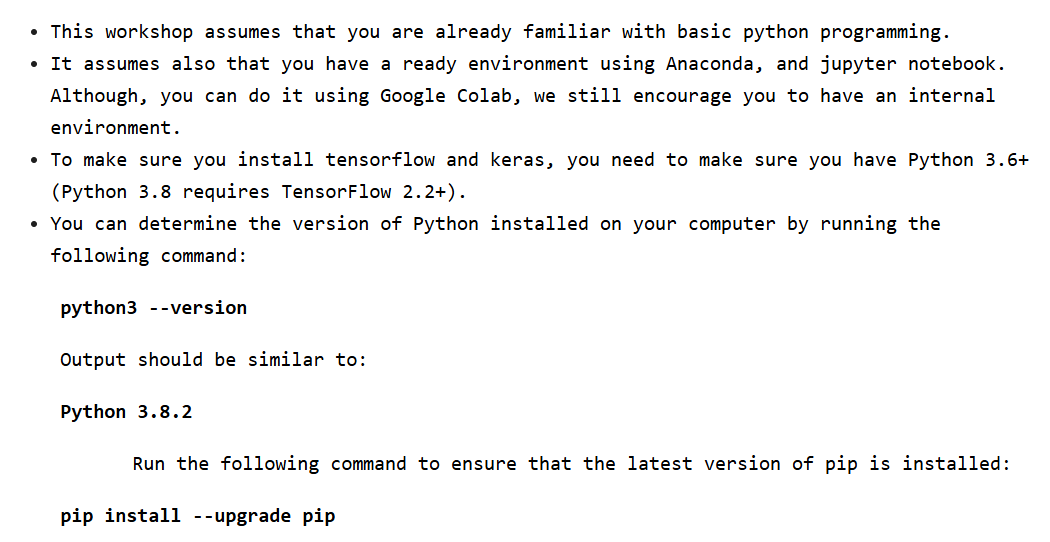
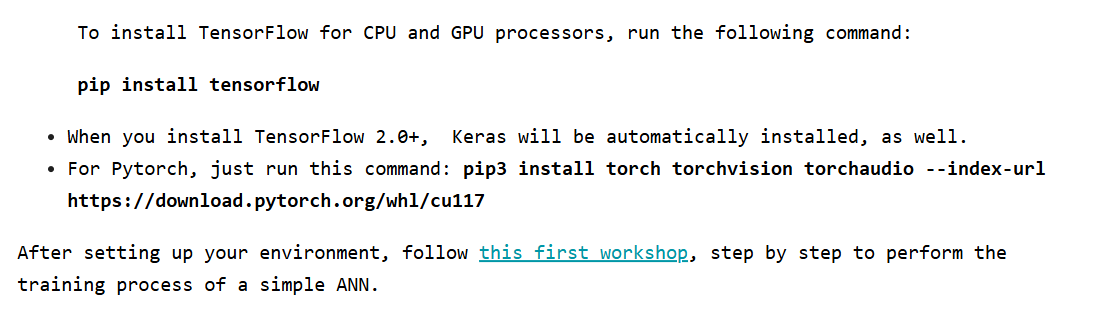